In [14]:
# %load_ext watermark
%watermark -a Chan -d -v -p sklearn,numpy,scipy,matplotlib

Chan 2019-07-26 

CPython 3.7.3
IPython 7.6.1

sklearn 0.21.2
numpy 1.16.4
scipy 1.3.0
matplotlib 3.1.0


In [16]:
import pandas as pd
import numpy as np

In [19]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

In [20]:
raw_iris = load_iris()

In [22]:
iris = pd.DataFrame(raw_iris.data, columns=raw_iris.feature_names)

In [35]:
iris['target'] = raw_iris.target

In [36]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# split data

In [25]:
train = iris.sample(frac=0.75) # 샘플링 방법이 부족해

In [28]:
# test = iris.pop(train)

KeyError: "None of [Int64Index([ 44,  62, 136, 112,   6,  52,  89, 111,  61, 105,\n            ...\n             20, 120,  84,  28,   1,  41,  13, 130,  79,  23],\n           dtype='int64', length=112)] are in the [columns]"

In [37]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1])

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
np.sum(knn.predict(X_test) == y_test.values), y_test.count()

(35, 38)

In [59]:
np.mean(knn.predict(X_test) == y_test.values)

0.9210526315789473

In [60]:
knn.score(X_test,y_test)

0.9210526315789473

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()

In [63]:
lr.fit(X_train, y_train)

C:\Users\skarn\Anaconda3\envs\data_campus\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skarn\Anaconda3\envs\data_campus\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
lr.score(X_test, y_test)

## 데이터가 작아서 성능이 왔다갔다한다.

0.868421052631579

# [Model Selection](https://scikit-learn.org/stable/tutorial/machine_learning_map/)
![model_selection_map](https://scikit-learn.org/stable/_static/ml_map.png)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(X_train, y_train)

C:\Users\skarn\Anaconda3\envs\data_campus\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
rf.feature_importances_

array([0.05606708, 0.06002099, 0.49633441, 0.38757752])

In [71]:
from sklearn.neural_network import MLPClassifier

In [72]:
from sklearn.linear_model import Perceptron

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
from sklearn.dummy import DummyClassifier
## 사람이 하는 행동처럼 분류하는 애

In [81]:
from sklearn.svm import SVC
# SVM. 학습 속도도 느리고, 예측 속도도 느리다.
# 정확도는 높다. 수학으로 구현되어 있다.

In [82]:
%time np.mean(cross_val_score(SVC(), iris.iloc[:,:-1], iris.iloc[:,-1], cv=10, n_jobs=-1))

Wall time: 191 ms


0.9800000000000001

In [75]:
dummpy = DummyClassifier()

----------------------------

## Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV # cross - validation

### Cross Validation
- 모든 데이터를 적어도 한번씩은 train할 때 쓴다.
- 평균을 내기 때문에 최종 모델로 쓸 수 없다.
- 오버피팅 여부를 체크하기 위해
- 데이터가 작을 때 성능을 체크하기 위해

In [77]:
from sklearn.model_selection import cross_val_score

In [83]:
%time np.mean(cross_val_score(KNeighborsClassifier(), iris.iloc[:,:-1], iris.iloc[:,-1], cv=10, n_jobs=-1))
# estimator : 알고리즘의 인스턴스
# n_jobs : 코어 개수. -1 이면 최대한 많이 쓴다.

Wall time: 120 ms


0.9666666666666668

In [84]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {'n_neighbors':range(1,10), 'leaf_size':[10,20,30]}

In [99]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)

In [100]:
grid.fit(iris.iloc[:,:-1], iris.iloc[:,-1])

C:\Users\skarn\Anaconda3\envs\data_campus\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\skarn\Anaconda3\envs\data_campus\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [10, 20, 30],
                         'n_neighbors': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
mean_fit_time,0.00366648,0.00465933,0.00499678,0.0026679,0.00266568,0.00299843,0.00266623,0.0029978,0.00365829,0.00299819,...,0.00233237,0.00266528,0.00299859,0.00233157,0.00266552,0.00233253,0.00300447,0.00233229,0.00266568,0.0026656
std_fit_time,0.000472944,0.00234949,0.00141315,0.000467324,0.000471146,1.12392e-07,0.000471708,0.000815561,0.00168964,1.12392e-07,...,0.000471089,0.000470865,1.94668e-07,0.000470303,0.000471033,0.000472157,7.81182e-06,0.000471483,0.000471483,0.000471764
mean_score_time,0.00599599,0.00633931,0.00599241,0.00432746,0.00433016,0.00399725,0.00432952,0.00466394,0.0063297,0.00433071,...,0.00399701,0.00366314,0.00399836,0.00466355,0.00433048,0.00399693,0.00399709,0.00399733,0.00399224,0.00399685
std_score_time,0.000814591,0.000937696,0.0028316,0.000467549,0.00047137,4.89904e-07,0.000470471,0.000470702,0.00124709,0.000471315,...,4.05234e-07,0.000470247,1.83993e-06,0.000942179,0.000470809,9.19965e-07,1.94668e-07,1.08387e-06,6.35684e-06,5.15043e-07
param_leaf_size,10,10,10,10,10,10,10,10,10,20,...,20,30,30,30,30,30,30,30,30,30
param_n_neighbors,1,2,3,4,5,6,7,8,9,1,...,9,1,2,3,4,5,6,7,8,9
params,"{'leaf_size': 10, 'n_neighbors': 1}","{'leaf_size': 10, 'n_neighbors': 2}","{'leaf_size': 10, 'n_neighbors': 3}","{'leaf_size': 10, 'n_neighbors': 4}","{'leaf_size': 10, 'n_neighbors': 5}","{'leaf_size': 10, 'n_neighbors': 6}","{'leaf_size': 10, 'n_neighbors': 7}","{'leaf_size': 10, 'n_neighbors': 8}","{'leaf_size': 10, 'n_neighbors': 9}","{'leaf_size': 20, 'n_neighbors': 1}",...,"{'leaf_size': 20, 'n_neighbors': 9}","{'leaf_size': 30, 'n_neighbors': 1}","{'leaf_size': 30, 'n_neighbors': 2}","{'leaf_size': 30, 'n_neighbors': 3}","{'leaf_size': 30, 'n_neighbors': 4}","{'leaf_size': 30, 'n_neighbors': 5}","{'leaf_size': 30, 'n_neighbors': 6}","{'leaf_size': 30, 'n_neighbors': 7}","{'leaf_size': 30, 'n_neighbors': 8}","{'leaf_size': 30, 'n_neighbors': 9}"
split0_test_score,0.980392,0.960784,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.960784,0.980392,...,0.960784,0.980392,0.960784,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.960784
split1_test_score,0.921569,0.941176,0.960784,0.960784,0.980392,0.960784,0.960784,0.980392,0.980392,0.921569,...,0.980392,0.921569,0.941176,0.960784,0.960784,0.980392,0.960784,0.960784,0.980392,0.980392
split2_test_score,1,0.958333,1,0.979167,1,0.979167,0.979167,0.979167,0.979167,1,...,0.979167,1,0.958333,1,0.979167,1,0.979167,0.979167,0.979167,0.979167


# Encoding


In [108]:
import seaborn

In [109]:
iris = seaborn.load_dataset('iris')

In [110]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
iris.species.map({'setosa':0, 'virginica':1, 'versicolor':2}).sample(10)

124    1
101    1
47     0
74     2
39     0
97     2
137    1
121    1
104    1
3      0
Name: species, dtype: int64

## 라벨 인코딩의 문제점
- train시 categorical data가 numeric data로 인지될 수 있다.
- test 데이터에서는 사용하여도 된다.

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
le = LabelEncoder()

In [124]:
le.fit(iris.species)

LabelEncoder()

In [125]:
le.transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [126]:
le.fit_transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## one-hot encoding
- 차원이 커진다.. 차원의 저주 걸릴 수 있다.
- 벡터의 크기는 무적권 0이다.

In [128]:
pd.get_dummies(iris.species).head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [129]:
from sklearn.preprocessing import OneHotEncoder

In [130]:
ohe = OneHotEncoder()

In [133]:
ohe.fit(iris[['species']]) # fancy indexing

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [139]:
ohe.transform(iris[['species']]).toarray()[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [140]:
ohe.fit_transform(iris[['species']]).toarray()[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [141]:
## 사이킷을 변환시킨 데이터를 편하게 거꾸로 돌릴 수 있다.
ohe.inverse_transform([[1,0,0]])

array([['setosa']], dtype=object)

In [144]:
le.inverse_transform([2,1,0])

array(['virginica', 'versicolor', 'setosa'], dtype=object)

-----------------------------------

# Preprocessing
- Standard Scale : $ z = \frac{x-\mu}{\sigma} $
    - test set에서는 하지 않아도 작동된다.
- 

In [146]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [151]:
iris.sepal_length.map(lambda x : x+1).head()
## predict할 때도 똑같이 바꿔줘야 한다.

0    6.1
1    5.9
2    5.7
3    5.6
4    6.0
Name: sepal_length, dtype: float64

In [158]:
## 학습이 잘 됬나???
from sklearn.model_selection import learning_curve, validation_curve

In [154]:
train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1],iris.iloc[:,-1])

C:\Users\skarn\Anaconda3\envs\data_campus\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [155]:
import sklearn_evaluation

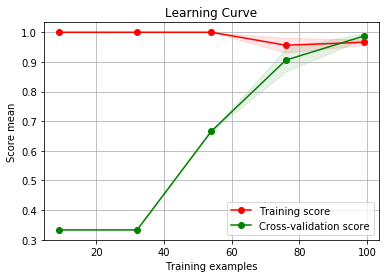

In [156]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)



- 수렴하는 그래프가 있어야 데이터가 충분하다고 볼 수 있다.
- 지금 그래프는 우상향중이기때문에 데이터 더 필요하다


- 전처리가 잘못된 경우거나 학습 자체가 불가능한 데이텅 경우 스코어가 상승하지 않는다.


- 딥러닝의 경우 데이터가 많아질수록 그냥 성능이 좋아진다.. 계속 상승하는 커브


In [176]:
training_score, test_score= validation_curve(KNeighborsClassifier(), iris.iloc[:,:-1],iris.iloc[:,-1], 
                                             param_name='n_neighbors', param_range=range(3,11),cv=10, n_jobs=-1)

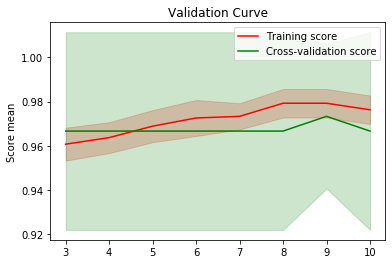

In [177]:
sklearn_evaluation.plot.validation_curve(training_score, test_score,param_range=range(3,11))

In [175]:
from sklearn.metrics import confusion_matrix

In [178]:
confusion_matrix(y_test, knn.predict(X_test))

array([[12,  0,  0],
       [ 0, 12,  3],
       [ 0,  0, 11]], dtype=int64)

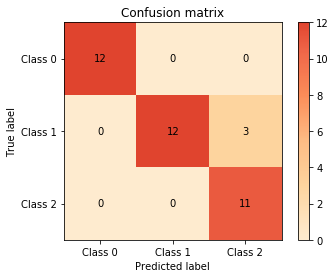

In [179]:
sklearn_evaluation.plot.confusion_matrix(y_test,knn.predict(X_test))

In [180]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.80      0.89        15
           2       0.79      1.00      0.88        11

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



In [183]:
import pandas_profiling

In [184]:
dir(pandas_profiling)

['DEFAULT_OUTPUTFILE',
 'NO_OUTPUTFILE',
 'ProfileReport',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'codecs',
 'describe',
 'formatters',
 'plot',
 'report',
 'templates',
 'to_html']

In [185]:
pandas_profiling.ProfileReport(iris)

Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,5.9 KiB
Average record size in memory,40.5 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [ ]:
pandas_profiling.ProfileReport(iris).to_file()